<a href="https://colab.research.google.com/github/nicolascechinel/sghFuzzy/blob/main/teste_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antecedentes (entradas)

Parede: min 0 e max 10
dificil, media, fácil

Temperatura: min 18 e max 35, ideal 28?

muito baixa <=18 , aceitável entre 18 e 35, ótimo 28, muito alta =>35

Consequentes (saídas)

Ar condicionado: 0% a 100%?

muito baixa, baixa, média, alta, muito alta
Regras

Se a temperatura for muito baixa liga o ac muito alta
Se a temperatura for baixa liga o ac alta
Se a temperatura for aceitavel liga o ac no medio
Se a temperatura for otima desliga o ar 
Se a temperatura for muito alta liga o ar no muito alto frio


Ventiladores: baixo, medio, alto
Se a temperatura for aceitavel liga no medio
Se a temperatura for muito alta liga no alto


In [ ]:
!pip install scikit-fuzzy


     |████████████████████████████████| 993 kB 8.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f721655f799444d5a9eaecd0853466f4df4bb7c0d0583cc2f42971d96eee4b0e
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
temperatura = ctrl.Antecedent(np.arange(0, 50, 1), 'temperatura')
radiacao = ctrl.Antecedent(np.arange(0, 11, 1), 'radiacao')
umidade = ctrl.Antecedent(np.arange(0, 100, 1), ' Umidade')
umidade_solo = ctrl.Antecedent(np.arange(0, 100, 1), ' Umidade_solo')

In [ ]:
radiacao

Antecedent: radiacao

In [ ]:
temperatura

Antecedent: temperatura

In [ ]:
temperatura.universe


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
radiacao.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
exaustor = ctrl.Consequent(np.arange(0, 11, 1), 'exaustor')
ventilador = ctrl.Consequent(np.arange(0, 11, 1), 'ventilador')
janelas = ctrl.Consequent(np.arange(0, 11, 1), 'janelas')
acOut = ctrl.Consequent(np.arange(0, 11, 1), 'acOut')

In [ ]:
acOut.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
temperatura.automf(number=4, names=['muito baixa', 'baixa', 'aceitavel' ,'otima', 'muito alta'])
radiacao.automf(number=3, names=['fraca', 'moderada', 'forte'])
umidade.automf(number=3, names=['muito baixa', 'media', 'Otima'])
umidade_solo.automf(number=3, names=['muito baixa', 'media', 'otima'])



temperatura['otima'] = fuzz.trimf(temperatura.universe, [0, 28, 50])
temperatura['aceitavel'] = fuzz.trapmf(temperatura.universe, [22, 28, 28, 31])
temperatura['muito alta'] = fuzz.trapmf(temperatura.universe, [29, 32, 50, 50])
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [11, 18, 19, 24])
temperatura['muito baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 11, 18])


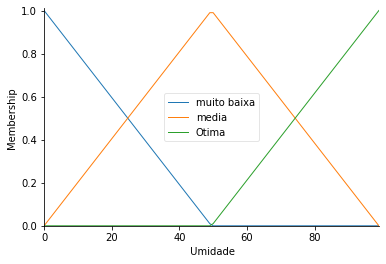

In [ ]:
umidade.view()

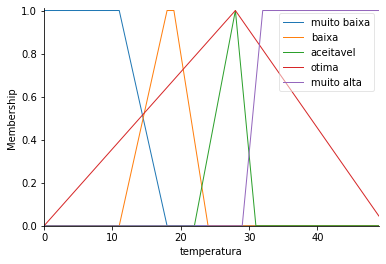

In [ ]:
temperatura.view()

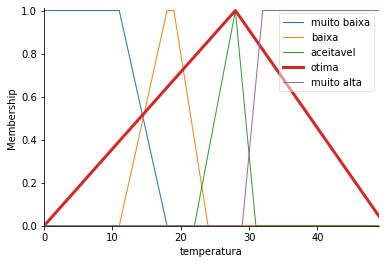

In [ ]:
temperatura['otima']. view()


In [ ]:
acOut.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Função triangular defuz

acOut['altaq'] = fuzz.trapmf(acOut.universe, [0, 0, 1, 1])
acOut['mediaq'] = fuzz.trimf(acOut.universe, [1 , 2, 3])
acOut['baixaq'] = fuzz.trimf(acOut.universe, [3, 3, 3.5 ])
acOut['off'] = fuzz.trapmf(acOut.universe, [4, 4, 5 ,5])
acOut['baixaf'] = fuzz.trimf(acOut.universe, [5.5, 6, 7])
acOut['mediaf'] = fuzz.trimf(acOut.universe, [6, 7, 8])
acOut['altaf'] = fuzz.trapmf(acOut.universe, [8, 8, 10,10])


In [ ]:
#Funcão Sigmoide
acOut['altaq'] = fuzz.gaussmf(acOut.universe, 0, 4)
acOut['mediaq'] = fuzz.gaussmf(acOut.universe, 18, 1)
acOut['baixaq'] = fuzz.gaussmf(acOut.universe, 26, 4)
acOut['off'] = fuzz.gaussmf(acOut.universe, 28, 4)
acOut['baixaf'] = fuzz.gaussmf(acOut.universe, 29, 3)
acOut['mediaf'] = fuzz.gaussmf(acOut.universe, 32, 1)
acOut['altaf'] = fuzz.gaussmf(acOut.universe, 40, 7)


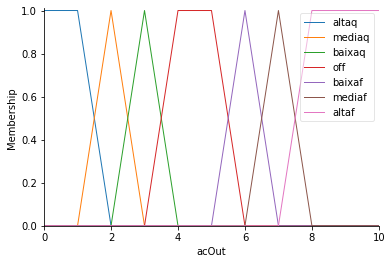

In [ ]:
acOut.view()

In [ ]:
regra1  = ctrl.Rule(temperatura['muito baixa'] & radiacao['fraca'], acOut['altaq'])
regra2  = ctrl.Rule(temperatura['muito baixa'] & radiacao['moderada'] ,acOut['mediaq'])
regra3  = ctrl.Rule(temperatura['muito baixa'] & radiacao['forte'] ,acOut['baixaq'])
regra4  = ctrl.Rule(temperatura['otima'] & radiacao['moderada'] ,acOut['off'])
regra5= ctrl.Rule(temperatura['muito alta'] & radiacao['fraca'], acOut['baixaf'])
regra6= ctrl.Rule(temperatura['muito alta'] & radiacao['moderada'], acOut['mediaf'])
regra7= ctrl.Rule(temperatura['muito alta'] & radiacao['forte'], acOut['altaf'])
regra3  = ctrl.Rule(temperatura['muito baixa'] & radiacao['forte'] ,acOut['baixaq'])



In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4,regra5, regra6, regra7])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['temperatura'] =28
sistema.input['radiacao'] = 6


sistema.compute()

4.5


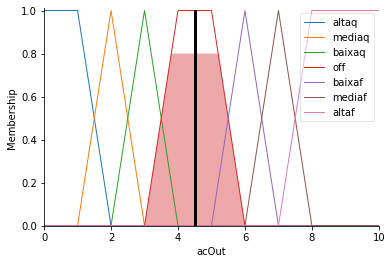

In [ ]:
print(sistema.output['acOut'])
acOut.view(sim = sistema)